In [ ]:
import dask.dataframe as dd
credit_record = dd.read_csv("https://s3.amazonaws.com/sqoop.oozie.ml/credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
application_record = dd.read_csv("https://s3.amazonaws.com/sqoop.oozie.ml/application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
create_report(application_record)

NameError: name 'create_report' is not defined

In [ ]:
final = dd.merge(credit_record,application_record,on='ID')
final.head()

In [ ]:
a = credit_record.shape
a[0].compute(),a[1]

In [ ]:
a = application_record.shape
a[0].compute(),a[1]

In [ ]:
a = final.shape
a[0].compute(),a[1]

In [ ]:
import pandas as pd
credit_record = pd.read_csv("credit_record.csv")
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
application_record = pd.read_csv("application_record.csv")
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
pt=pd.pivot_table(data=credit_record,index='ID',columns='STATUS',values='MONTHS_BALANCE',aggfunc='count',fill_value=0)
pt['total_delinquent']=pt.iloc[:,1]+pt.iloc[:,2]+pt.iloc[:,3]+pt.iloc[:,4]+pt.iloc[:,5]
pt['target']=pt['total_delinquent'].apply(lambda x:1 if x!=0 else 0)
pt.head()

STATUS,0,1,2,3,4,5,C,X,total_delinquent,target
ID,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,0,0
5001712,10,0,0,0,0,0,9,0,0,0
5001713,0,0,0,0,0,0,0,22,0,0
5001714,0,0,0,0,0,0,0,15,0,0
5001715,0,0,0,0,0,0,0,60,0,0


In [ ]:
pt = pt[['target']]

In [ ]:
pt.shape

(45985, 1)

In [ ]:
credit_record.shape

(1048575, 3)

In [ ]:
application_record.shape

(438557, 18)

In [ ]:
final = pd.merge(pt,application_record,on='ID')
final.shape

(36457, 19)

In [ ]:
final = final.drop('ID',axis=1)
final.head()

,target,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(final)
sweet_report.show_html('sweet_report.html')


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(final)
design_report.to_file(output_file='report.html')

In [ ]:
import dtale
import pandas as pd
d = dtale.show(final)
d.open_browser()

C:\Users\sayan\anaconda3\lib\site-packages\dash_bootstrap_components\_table.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
X = final.drop('target',axis=1)
y = final['target']
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)

WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([  27000.,  135000.,  202500., 1575000.]),
                         'CNT_CHILDREN': array([ 0.,  1., 19.]),
                         'CNT_FAM_MEMBERS': array([ 1.,  2., 20.]),
                         'DAYS_BIRTH': array([-25152., -18085., -13545.,  -7489.]),
                         'DAYS_EMPLOYED': array([-15713.,  -2512.,   -762., 365243.]),
                         'FLAG_EMAIL': array([0., 1.]),
                         'FLAG_MOBIL': array([1.]),
                         'FLAG_PHONE': array([0., 1.]),
                         'FLAG_...
                                  'Low-skill Laborers': 0.5550706919292876,
                                  'Managers': 0.10884426286411482,
                                  'Medicine staff': 0.15732562042824635,
                                  'NA': -0.11623544902968029,
                                  'Private service staff': -0.6691189041220243,
                                  'Realty age

In [ ]:
X = clf.transform(X)
X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.090813,-0.042655,-0.062117,-0.016592,0.092374,-0.017516,-0.012749,0.064983,0.191859,0.130236,0.011547,0.0,-0.000857,0.012689,-0.019294,-0.116235,-0.009197
1,0.090813,-0.042655,-0.062117,-0.016592,0.092374,-0.017516,-0.012749,0.064983,0.191859,0.130236,0.011547,0.0,-0.000857,0.012689,-0.019294,-0.116235,-0.009197
2,0.090813,-0.042655,-0.062117,-0.016592,-0.041559,-0.017516,-0.010246,-0.013198,-0.014551,-0.079759,0.031467,0.0,0.000250,0.012689,-0.019294,0.308644,-0.009197
3,-0.047125,0.025439,-0.062117,-0.016592,0.092374,0.088521,-0.010246,0.104669,-0.014551,-0.079759,0.011547,0.0,0.000250,-0.030863,0.181365,-0.059897,-0.009197
4,-0.047125,0.025439,-0.062117,-0.016592,0.092374,0.088521,-0.010246,0.104669,-0.014551,-0.079759,0.011547,0.0,0.000250,-0.030863,0.181365,-0.059897,-0.009197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002
36453,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002
36454,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002
36455,-0.047125,-0.042655,-0.062117,-0.016592,-0.046371,-0.017516,-0.010246,-0.013198,-0.014551,0.130236,0.031467,0.0,0.000250,0.012689,-0.019294,0.103968,0.024002


In [ ]:
clf.woe_df.head(50)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,AMT_INCOME_TOTAL,"(26999.999, 135000.0]",14473,1642,12831,0.113453,0.886547,0.382661,0.398899,-0.041559,4.030229e-03
1,AMT_INCOME_TOTAL,"(135000.0, 202500.0]",10702,1209,9493,0.112970,0.887030,0.281753,0.295125,-0.046371,4.030229e-03
2,AMT_INCOME_TOTAL,"(202500.0, 1575000.0]",11282,1440,9842,0.127637,0.872363,0.335586,0.305975,0.092374,4.030229e-03
3,CNT_CHILDREN,"(-0.001, 1.0]",32693,3792,28901,0.115988,0.884012,0.883710,0.898495,-0.016592,2.255834e-03
4,CNT_CHILDREN,"(1.0, 19.0]",3764,499,3265,0.132572,0.867428,0.116290,0.101505,0.135981,2.255834e-03
5,CNT_FAM_MEMBERS,"(0.999, 2.0]",26450,3088,23362,0.116749,0.883251,0.719646,0.726295,-0.009197,2.207454e-04
6,CNT_FAM_MEMBERS,"(2.0, 20.0]",10007,1203,8804,0.120216,0.879784,0.280354,0.273705,0.024002,2.207454e-04
7,CODE_GENDER,F,24430,2758,21672,0.112894,0.887106,0.642741,0.673755,-0.047125,4.278055e-03
8,CODE_GENDER,M,12027,1533,10494,0.127463,0.872537,0.357259,0.326245,0.090813,4.278055e-03
9,DAYS_BIRTH,"(-25152.001, -18085.0]",12155,1333,10822,0.109667,0.890333,0.310650,0.336442,-0.079759,9.205405e-03


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10,scoring='f1')
print(scoresdt)
print("Average f1")
print(np.mean(scoresdt))

Training Accuracy
0.8818446768386765
Testing Accuracy
0.8841195831047723
[[6447    0]
 [ 845    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6447
           1       0.00      0.00      0.00       845

    accuracy                           0.88      7292
   macro avg       0.44      0.50      0.47      7292
weighted avg       0.78      0.88      0.83      7292

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Average f1
0.0


Automatically created module for IPython interactive environment


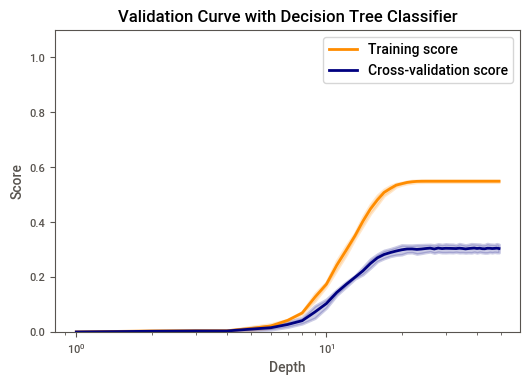

In [ ]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), Xtrain, ytrain, param_name="max_depth",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
lr = RandomForestClassifier(n_estimators=100,class_weight='balanced')
lr.fit(Xtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10,scoring='f1')
print(scoresdt)
print("Average f1")
print(np.mean(scoresdt))

Training Accuracy
0.8546545516886679
Testing Accuracy
0.8006034009873835
[[5441 1006]
 [ 448  397]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      6447
           1       0.28      0.47      0.35       845

    accuracy                           0.80      7292
   macro avg       0.60      0.66      0.62      7292
weighted avg       0.85      0.80      0.82      7292

[0.37127072 0.35372636 0.37991266 0.36363636 0.36203091 0.39724455
 0.38359202 0.37849944 0.38709677 0.37069922]
Average f1
0.37477090149315


In [ ]:
lr.predict(Xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
lr.predict_proba(Xtest)

array([[1.        , 0.        ],
       [0.89658799, 0.10341201],
       [0.92574206, 0.07425794],
       ...,
       [1.        , 0.        ],
       [0.51358838, 0.48641162],
       [0.94039807, 0.05960193]])

Automatically created module for IPython interactive environment


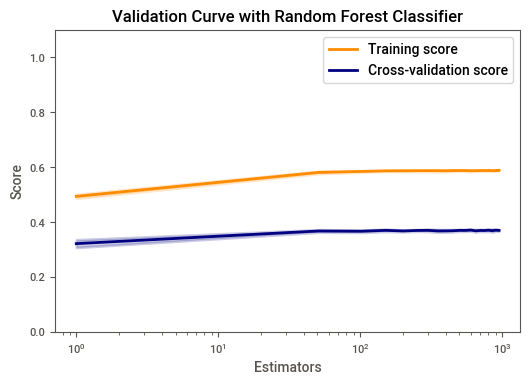

In [ ]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,1000,50)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(class_weight='balanced'), Xtrain, ytrain, param_name="n_estimators",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest Classifier")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn import model_selection
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=50)
models = []
models.append(('Logistic Regression',lr))
models.append(('Decision Tree Classifier',dt))
models.append(('Random Forest Classifier',rf))
models.append(('Gradient Boosting Classifier',gb))

Logistic Regression: 0.000000 (0.000000)
Decision Tree Classifier: 0.226604 (0.014158)
Random Forest Classifier: 0.235627 (0.017276)
Gradient Boosting Classifier: 0.002907 (0.002874)


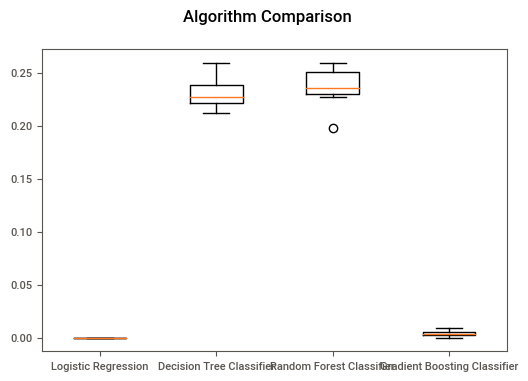

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold,scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()